### Here are some of the benefits of applying dimensionality reduction to a dataset:

### 1.) Space required to store the data is reduced as the number of dimensions comes down Less dimensions lead to less computation/training time

### 2.) Some algorithms do not perform well when we have a large dimensions. So reducing these dimensions needs to happen for the algorithm to be useful

### 3.) It takes care of multicollinearity by removing redundant features. For example, you have two variables – ‘time spent on treadmill in minutes’ and ‘calories burnt’. These variables are highly correlated as the more time you spend running on a treadmill, the more calories you will burn. Hence, there is no point in storing both as just one of them does what you require

### 4.) It helps in visualizing data. As discussed earlier, it is very difficult to visualize data in higher dimensions so reducing our space to 2D or 3D may allow us to plot and observe patterns more clearly

### Common Dimensionality Reduction Techniques:

### 1 Missing Value Ratio
### 2 Low Variance Filter
### 3 High Correlation Filter
### 4 Random Forest
### 5 Backward Feature Elimination
### 6 Forward Feature Selection
### 7 Factor Analysis
### 8 Principal Component Analysis
### 9 Independent Component Analysis
### 10 Methods Based on Projections
### 11 t-Distributed Stochastic Neighbor Embedding (t-SNE)
### 12 UMAP

In [2]:
#Importing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use("fivethirtyeight")

In [3]:
#Load Data
data=pd.read_csv("C:/BITsPilaniMTECH2123/Sem2/ML/Practice_2023/marketing_campaign.csv", sep="\t")
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

## Missing Value Ratio

In [6]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,'percent_missing': percent_missing})
missing_value_df

#Note: No features with more 20% NA, So will not be dropping, so need to impute.

column_name  percent_missing
ID                                    ID         0.000000
Year_Birth                    Year_Birth         0.000000
Education                      Education         0.000000
Marital_Status            Marital_Status         0.000000
Income                            Income         1.071429
Kidhome                          Kidhome         0.000000
Teenhome                        Teenhome         0.000000
Dt_Customer                  Dt_Customer         0.000000
Recency                          Recency         0.000000
MntWines                        MntWines         0.000000
MntFruits                      MntFruits         0.000000
MntMeatProducts          MntMeatProducts         0.000000
MntFishProducts          MntFishProducts         0.000000
MntSweetProducts        MntSweetProducts         0.000000
MntGoldProds                MntGoldProds         0.000000
NumDealsPurchases      NumDealsPurchases         0.000000
NumWebPurchases          NumWebPurchases         0.000000
NumCatalogPurchases  NumCatalogPurchases         0.000000
NumStorePurchases      NumStorePurchases         0.000000
NumWebVisitsMonth      NumWebVisitsMonth         0.000000
AcceptedCmp3                AcceptedCmp3         0.000000
AcceptedCmp4                AcceptedCmp4         0.000000
AcceptedCmp5                AcceptedCmp5         0.000000
AcceptedCmp1                AcceptedCmp1         0.000000
AcceptedCmp2                AcceptedCmp2         0.000000
Complain                        Complain         0.000000
Z_CostContact              Z_CostContact         0.000000
Z_Revenue                      Z_Revenue         0.000000
Response                        Response         0.000000

## Low Variance Filter

In [18]:
#Selection based on data types
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

In [21]:
data1 = data[categorical_columns]
data1.head()

Education Marital_Status Dt_Customer
0  Graduation         Single  04-09-2012
1  Graduation         Single  08-03-2014
2  Graduation       Together  21-08-2013
3  Graduation       Together  10-02-2014
4         PhD        Married  19-01-2014

In [23]:
#https://plotly.com/python/bar-charts/
import plotly.express as px
fig = px.bar(data1, x='Education')
fig.show()

In [24]:
fig = px.bar(data1, x='Marital_Status')
fig.show()

In [25]:
fig = px.bar(data1, x='Dt_Customer')
fig.show()

In [32]:
data2 = data[numerical_columns]
data2.drop(['ID','Year_Birth'], axis=1, inplace=True)
data2.head()

C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_6176\688602538.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  NumWebVisitsMonth  \
0              172                88            88  ...                  7   
1                2                 1             6  ...                  5   
2              111                21            42  ...                  4   
3               10                 3             5  ...                  6   
4               46                27            15  ...                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Z_CostContact  Z_Revenue  Response  
0         0              3         11         1  
1         0              3         11         0  
2         0              3         11         0  
3         0              3         11         0  
4         0              3         11         0  

[5 rows x 24 columns]

In [33]:
# variance of the dataframe
data2.var()

Income                 6.336838e+08
Kidhome                2.898725e-01
Teenhome               2.965219e-01
Recency                8.388237e+02
MntWines               1.132978e+05
MntFruits              1.581926e+03
MntMeatProducts        5.094743e+04
MntFishProducts        2.984325e+03
MntSweetProducts       1.704080e+03
MntGoldProds           2.721442e+03
NumDealsPurchases      3.733542e+00
NumWebPurchases        7.721252e+00
NumCatalogPurchases    8.544517e+00
NumStorePurchases      1.056873e+01
NumWebVisitsMonth      5.888606e+00
AcceptedCmp3           6.750283e-02
AcceptedCmp4           6.902615e-02
AcceptedCmp5           6.750283e-02
AcceptedCmp1           6.017993e-02
AcceptedCmp2           1.321939e-02
Complain               9.291257e-03
Z_CostContact          0.000000e+00
Z_Revenue              0.000000e+00
Response               1.269309e-01
dtype: float64

In [34]:
# Row variance of the dataframe
data2.var(axis=1)

0       1.404993e+08
1       8.947488e+07
2       2.134741e+08
3       2.957334e+07
4       1.414711e+08
            ...     
2235    1.558844e+08
2236    1.706213e+08
2237    1.350365e+08
2238    1.995715e+08
2239    1.164169e+08
Length: 2240, dtype: float64

## High Correlation Filter

In [35]:
cormat = data2.corr()
round(cormat,2)

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
Income                 1.00    -0.43      0.02    -0.00      0.58       0.43   
Kidhome               -0.43     1.00     -0.04     0.01     -0.50      -0.37   
Teenhome               0.02    -0.04      1.00     0.02      0.00      -0.18   
Recency               -0.00     0.01      0.02     1.00      0.02      -0.00   
MntWines               0.58    -0.50      0.00     0.02      1.00       0.39   
MntFruits              0.43    -0.37     -0.18    -0.00      0.39       1.00   
MntMeatProducts        0.58    -0.44     -0.26     0.02      0.56       0.54   
MntFishProducts        0.44    -0.39     -0.20     0.00      0.40       0.59   
MntSweetProducts       0.44    -0.37     -0.16     0.02      0.39       0.57   
MntGoldProds           0.33    -0.35     -0.02     0.02      0.39       0.39   
NumDealsPurchases     -0.08     0.22      0.39    -0.00      0.01      -0.13   
NumWebPurchases        0.39    -0.36      0.16    -0.01      0.54       0.30   
NumCatalogPurchases    0.59    -0.50     -0.11     0.03      0.64       0.49   
NumStorePurchases      0.53    -0.50      0.05     0.00      0.64       0.46   
NumWebVisitsMonth     -0.55     0.45      0.13    -0.02     -0.32      -0.42   
AcceptedCmp3          -0.02     0.01     -0.04    -0.03      0.06       0.01   
AcceptedCmp4           0.18    -0.16      0.04     0.02      0.37       0.01   
AcceptedCmp5           0.34    -0.21     -0.19     0.00      0.47       0.22   
AcceptedCmp1           0.28    -0.17     -0.14    -0.02      0.35       0.19   
AcceptedCmp2           0.09    -0.08     -0.02    -0.00      0.21      -0.01   
Complain              -0.03     0.04      0.00     0.01     -0.04      -0.01   
Z_CostContact           NaN      NaN       NaN      NaN       NaN        NaN   
Z_Revenue               NaN      NaN       NaN      NaN       NaN        NaN   
Response               0.13    -0.08     -0.15    -0.20      0.25       0.13   

                     MntMeatProducts  MntFishProducts  MntSweetProducts  \
Income                          0.58             0.44              0.44   
Kidhome                        -0.44            -0.39             -0.37   
Teenhome                       -0.26            -0.20             -0.16   
Recency                         0.02             0.00              0.02   
MntWines                        0.56             0.40              0.39   
MntFruits                       0.54             0.59              0.57   
MntMeatProducts                 1.00             0.57              0.52   
MntFishProducts                 0.57             1.00              0.58   
MntSweetProducts                0.52             0.58              1.00   
MntGoldProds                    0.35             0.42              0.37   
NumDealsPurchases              -0.12            -0.14             -0.12   
NumWebPurchases                 0.29             0.29              0.35   
NumCatalogPurchases             0.72             0.53              0.49   
NumStorePurchases               0.48             0.46              0.45   
NumWebVisitsMonth              -0.54            -0.45             -0.42   
AcceptedCmp3                    0.02             0.00              0.00   
AcceptedCmp4                    0.10             0.02              0.03   
AcceptedCmp5                    0.37             0.20              0.26   
AcceptedCmp1                    0.31             0.26              0.24   
AcceptedCmp2                    0.04             0.00              0.01   
Complain                       -0.02            -0.02             -0.02   
Z_CostContact                    NaN              NaN               NaN   
Z_Revenue                        NaN              NaN               NaN   
Response                        0.24             0.11              0.12   

                     MntGoldProds  ...  NumWebVisitsMonth  AcceptedCmp3  \
Income                       0.33  ...              -0.55         -0.

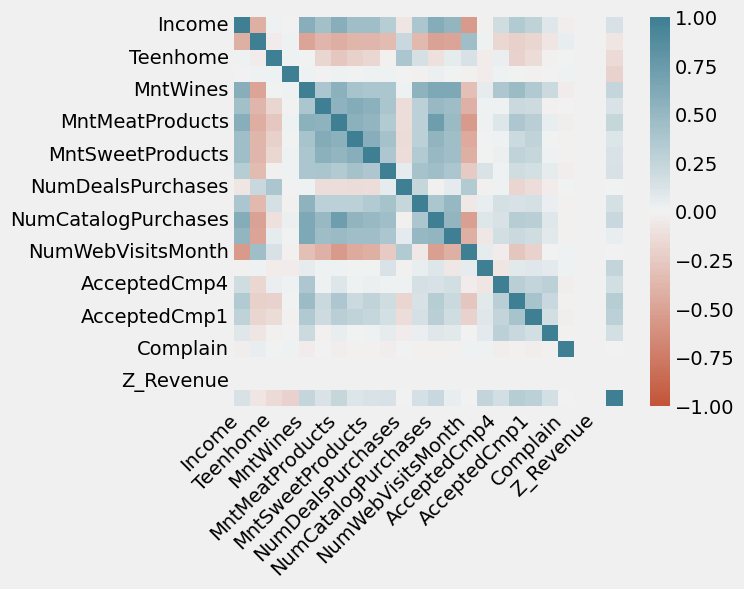

In [36]:
ax = sns.heatmap(
    cormat, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Random Forest

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

In [52]:
data = data.dropna()
X = data[numerical_columns]
y = data.Response
X.drop(['Response','ID','Year_Birth'], axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [53]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [54]:
rf.feature_importances_

array([0.07702051, 0.01150241, 0.01347431, 0.1134049 , 0.0965303 ,
       0.05559746, 0.08676403, 0.04970036, 0.05584439, 0.06936131,
       0.03617957, 0.03999849, 0.05153753, 0.04815585, 0.05368633,
       0.04456124, 0.0105511 , 0.04397275, 0.02974641, 0.01076157,
       0.00164918, 0.        , 0.        ])

<BarContainer object of 23 artists>

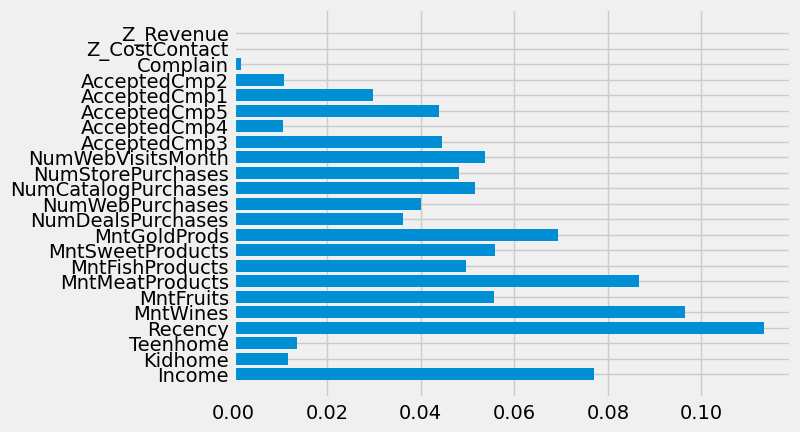

In [58]:
plt.barh(X.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

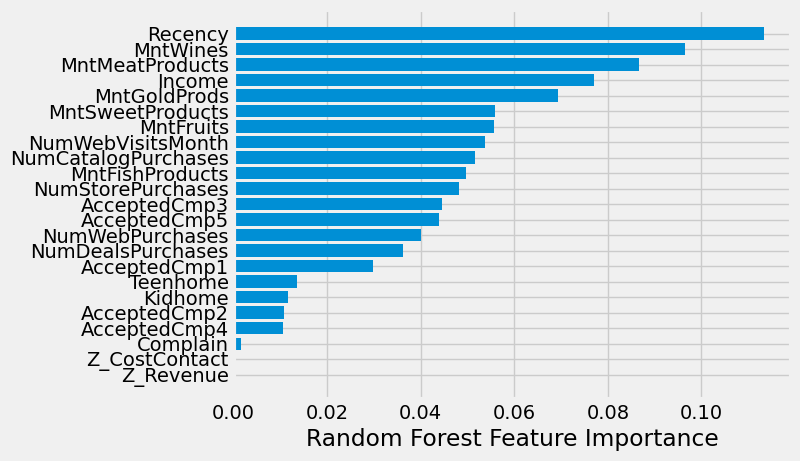

In [59]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [60]:
#Permutation Based Feature Importance (with scikit-learn)
perm_importance = permutation_importance(rf, X_test, y_test)

Text(0.5, 0, 'Permutation Importance')

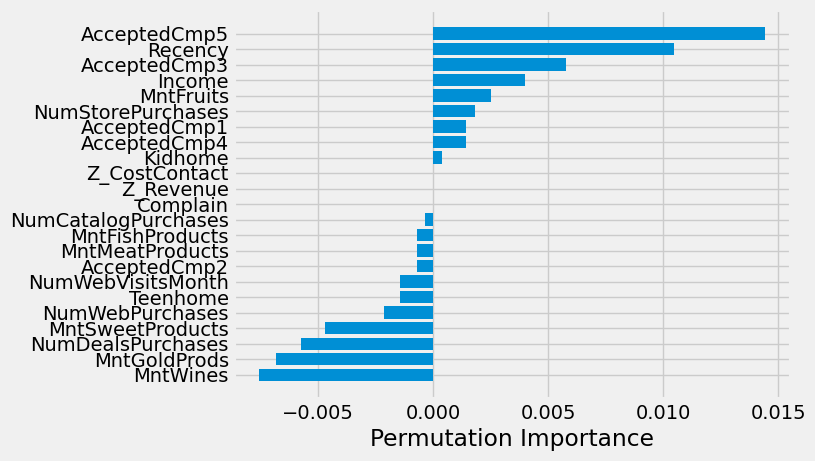

In [62]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [63]:
#Feature Importance Computed with SHAP Values
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

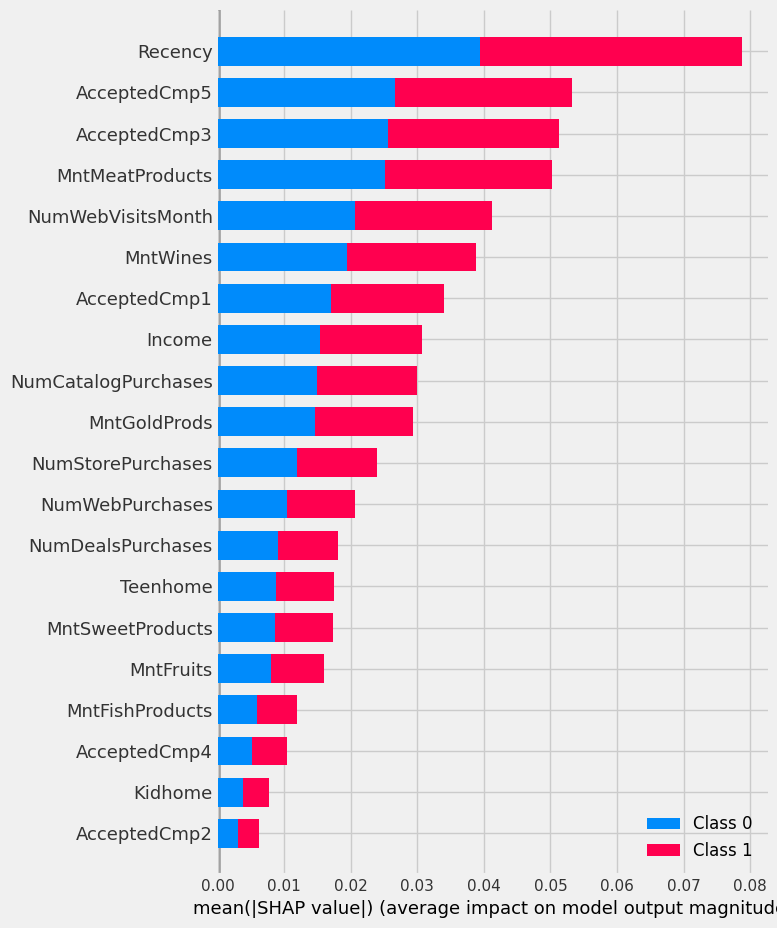

In [64]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

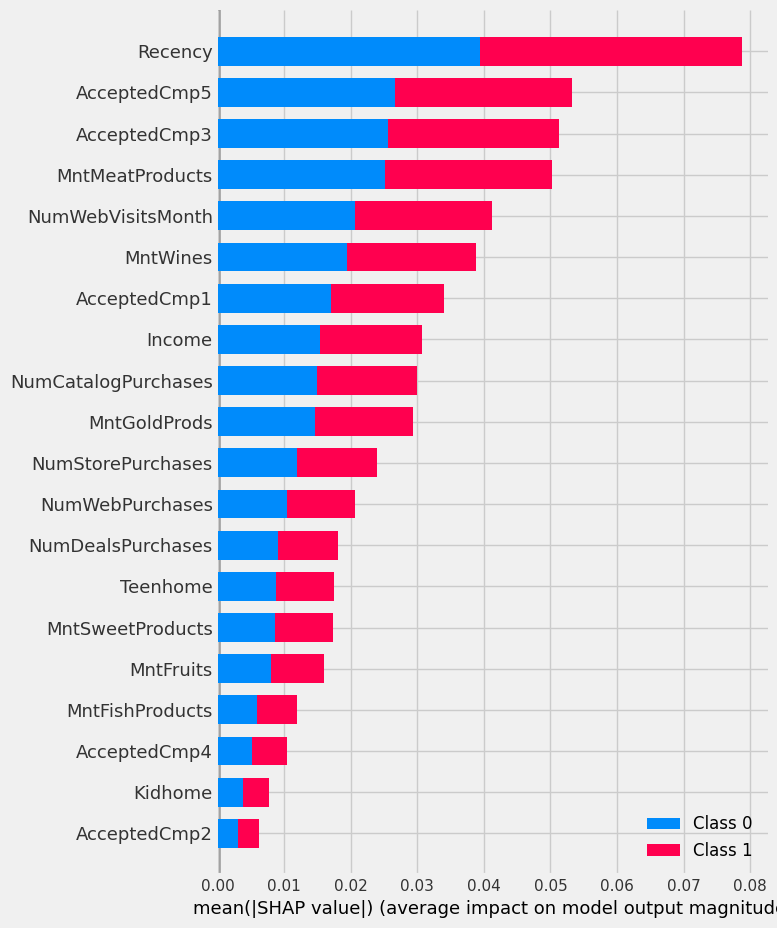

In [65]:
shap.summary_plot(shap_values, X_test)

## Backward Feature Elimination

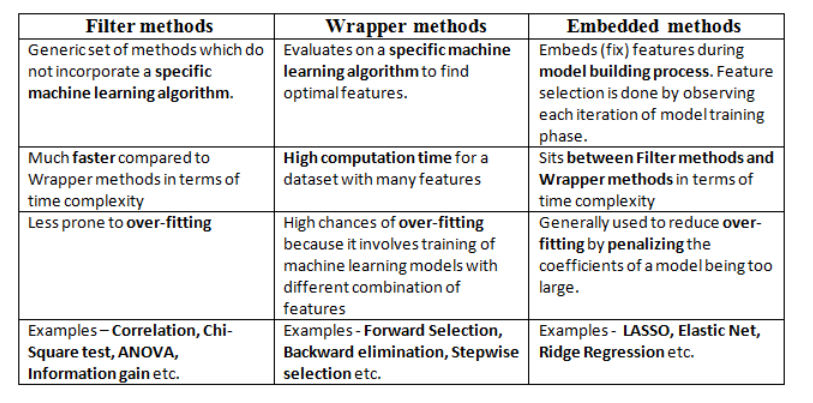

### Most commonly used techniques under wrapper methods are:

### Forward selection

### Backward elimination

### Bi-directional elimination(Stepwise Selection)

## Forward Feature Selection

In [66]:
#https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/

## Factor Analysis

### The various steps involved in factor analysis are
### Bartlett’s Test of Sphericity and KMO Test
### Determining the number of factors
### Interpreting the factors

### Make sure that you have removed the outliers, standard scaled the data and also the features have to be numeric.

In [67]:
#https://www.analyticsvidhya.com/blog/2020/10/dimensionality-reduction-using-factor-analysis-in-python/

In [74]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer import FactorAnalyzer

In [82]:

X = X.dropna()
X = X[['Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]
X.head()

Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  58138.0       58       635         88              546              172   
1  46344.0       38        11          1                6                2   
2  71613.0       26       426         49              127              111   
3  26646.0       26        11          4               20               10   
4  58293.0       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  
0                88            88  
1                 1             6  
2                21            42  
3                 3             5  
4                27            15

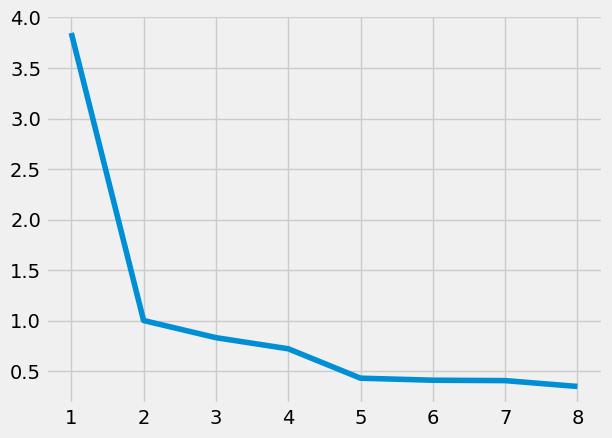

In [84]:
#Subset of the data, the 14 columns containing the survey answers
fa = FactorAnalyzer()
fa.fit(X, 10)
#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev

plt.plot(range(1,X.shape[1]+1),ev)

In [85]:
fa = FactorAnalyzer(3, rotation='varimax')
fa.fit(X)
loads = fa.loadings_
print(loads)

[[0.35645068 0.6459522  0.155405  ]
 [0.00355129 0.01051516 0.01506018]
 [0.24892388 0.69870201 0.25025743]
 [0.69924991 0.23800597 0.18446731]
 [0.55239694 0.56455546 0.14662456]
 [0.71852809 0.24029924 0.21049219]
 [0.68224827 0.26122841 0.14680591]
 [0.2731483  0.12393744 0.95139709]]


In [87]:
#https://towardsdatascience.com/factor-analysis-a-complete-tutorial-1b7621890e42
#https://www.kaggle.com/code/francoisstamant/eda-and-factor-analysis

### What is Dimensionality Reduction?
### Many Machine Learning problems involve thousands of features, having such a large number of features bring along many problems, the most important ones are:

### Makes the training extremely slow
### Makes it difficult to find a good solution

### This is known as the curse of dimensionality and the Dimensionality Reduction is the process of reducing the number of features to the most relevant ones in simple terms.

## Principal Component Analysis

### This works by identifying the hyperplane which lies closest to the data and then projects the data on that hyperplane while retaining most of the variation in the data set.

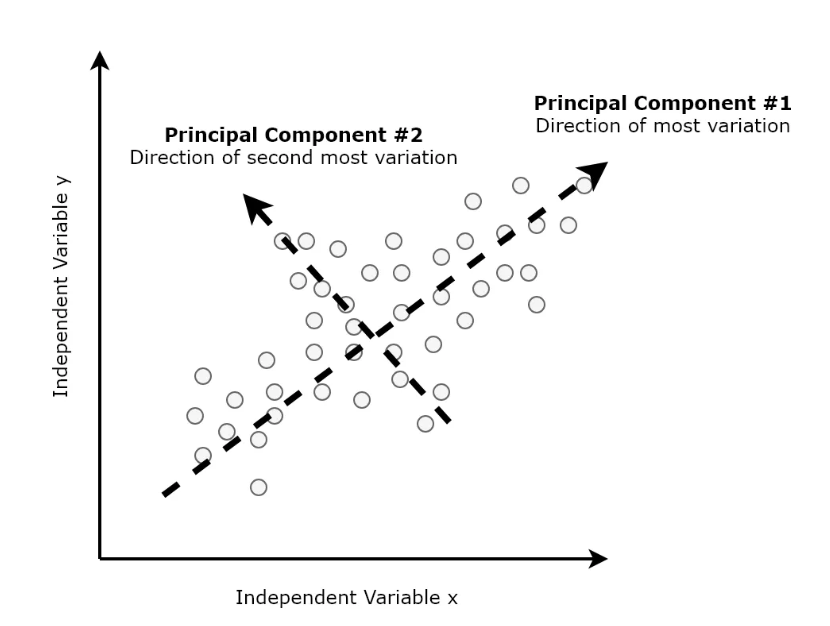

In [91]:
X = data[numerical_columns]
X.drop(['Response','ID','Year_Birth'], axis=1, inplace=True)
X = X.dropna()
X.head(2)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  NumStorePurchases  \
0              172                88            88  ...                  4   
1                2                 1             6  ...                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  
0             0         0              3         11  
1             0         0              3         11  

[2 rows x 23 columns]

In [92]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 0.2340627 , -0.82303932, -0.92897224, ..., -0.09781206,
         0.        ,  0.        ],
       [-0.23455948,  1.03993835,  0.90906569, ..., -0.09781206,
         0.        ,  0.        ],
       [ 0.76947764, -0.82303932, -0.92897224, ..., -0.09781206,
         0.        ,  0.        ],
       ...,
       [ 0.18809052, -0.82303932, -0.92897224, ..., -0.09781206,
         0.        ,  0.        ],
       [ 0.67538765, -0.82303932,  0.90906569, ..., -0.09781206,
         0.        ,  0.        ],
       [ 0.02470453,  1.03993835,  0.90906569, ..., -0.09781206,
         0.        ,  0.        ]])

In [93]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[ 3.49110485, -0.1999585 , -1.5632943 , ...,  0.17362187,
        -0.        , -0.        ],
       [-2.42569387, -0.41388312,  0.13006126, ..., -0.05311848,
         0.        ,  0.        ],
       [ 1.66678001, -0.24571767, -0.80893906, ...,  0.05599046,
         0.        ,  0.        ],
       ...,
       [ 1.58099383,  0.59897684,  1.77607888, ...,  0.06533651,
         0.        , -0.        ],
       [ 1.75422944,  0.64714648, -1.0047605 , ...,  0.36188486,
        -0.        ,  0.        ],
       [-2.03337302,  0.55473603, -0.07855374, ...,  0.23530681,
        -0.        ,  0.        ]])

In [108]:
# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X.shape[1])]
X_pca = pd.DataFrame(X, columns=component_names)
X_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.234063 -0.823039 -0.928972  0.310532  0.978226  1.549429  1.690227   
1 -0.234559  1.039938  0.909066 -0.380509 -0.872024 -0.637328 -0.717986   
2  0.769478 -0.823039 -0.928972 -0.795134  0.358511  0.569159 -0.178368   
3 -1.017239  1.039938 -0.928972 -0.795134 -0.872024 -0.561922 -0.655551   
4  0.240221  1.039938 -0.928972  1.554407 -0.391671  0.418348 -0.218505   

        PC8       PC9      PC10  ...      PC14      PC15      PC16      PC17  \
0  2.454568  1.484827  0.850031  ... -0.554143  0.693232 -0.281773 -0.282705   
1 -0.651038 -0.633880 -0.732867  ... -1.169518 -0.131574 -0.281773 -0.282705   
2  1.340203 -0.146821 -0.037937  ...  1.291982 -0.543978 -0.281773 -0.282705   
3 -0.504892 -0.585174 -0.752171  ... -0.554143  0.280829 -0.281773 -0.282705   
4  0.152766 -0.000703 -0.559135  ...  0.061232 -0.131574 -0.281773 -0.282705   

       PC18      PC19      PC20      PC21  PC22  PC23  
0 -0.280839 -0.261661 -0.117148 -0.097812   0.0   0.0  
1 -0.280839 -0.261661 -0.117148 -0.097812   0.0   0.0  
2 -0.280839 -0.261661 -0.117148 -0.097812   0.0   0.0  
3 -0.280839 -0.261661 -0.117148 -0.097812   0.0   0.0  
4 -0.280839 -0.261661 -0.117148 -0.097812   0.0   0.0  

[5 rows x 23 columns]

In [109]:
pca.get_covariance()

array([[ 1.00045147e+00, -4.28862538e-01,  1.91420163e-02,
        -3.97154775e-03,  5.78910992e-01,  4.31036192e-01,
         5.84897300e-01,  4.39069496e-01,  4.40942773e-01,
         3.26063587e-01, -8.31384131e-02,  3.88052925e-01,
         5.89428429e-01,  5.29601130e-01, -5.53337713e-01,
        -1.61817423e-02,  1.84483619e-01,  3.36094933e-01,
         2.76944839e-01,  8.75842977e-02, -2.72368033e-02,
         0.00000000e+00,  0.00000000e+00],
       [-4.28862538e-01,  1.00045147e+00, -3.98870945e-02,
         1.14973372e-02, -4.97560389e-01, -3.73564678e-01,
        -4.39458841e-01, -3.89059789e-01, -3.78196794e-01,
        -3.55189709e-01,  2.17010977e-01, -3.72144485e-01,
        -5.04728387e-01, -5.01575152e-01,  4.47678962e-01,
         1.60732755e-02, -1.62099121e-01, -2.05397289e-01,
        -1.74241712e-01, -8.19048905e-02,  4.09964492e-02,
         0.00000000e+00,  0.00000000e+00],
       [ 1.91420163e-02, -3.98870945e-02,  1.00045147e+00,
         1.38441306e-02,  3.7

In [110]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.30751878, 0.091066  , 0.08149166, 0.0569087 , 0.04846015,
       0.04699478, 0.04421053, 0.03958773, 0.03540832, 0.03286939,
       0.02918991, 0.02773795, 0.0269237 , 0.02276382, 0.02066909,
       0.02010373, 0.0181045 , 0.01515892, 0.01425576, 0.01124508,
       0.00933149, 0.        , 0.        ])

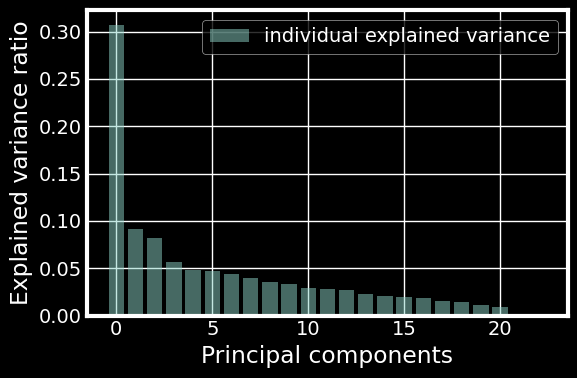

In [111]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(23), explained_variance, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [112]:
#https://www.kaggle.com/code/nirajvermafcb/principal-component-analysis-with-scikit-learn

## t-SNE ( T-distributed stochastic neighbour embedding )

### (t-SNE) takes a high dimensional data set and reduces it to a low dimensional graph that retains a lot of the original information. It does so by giving each data point a location in a two or three-dimensional map. This technique finds clusters in data thereby making sure that an embedding preserves the meaning in the data. t-SNE reduces dimensionality while trying to keep similar instances close and dissimilar instances apart.

## LDA ( Linear Discriminant Analysis )

### The goal is to project a dataset onto a lower-dimensional space with good class-separability in order to avoid overfitting and also reduce computational costs.

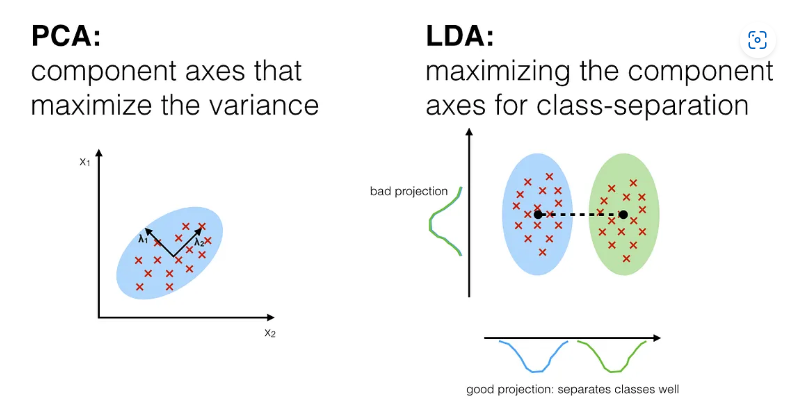

## UMAP ( Uniform Manifold Approximation and Projection )

### UMAP is a nonlinear dimensionality reduction method, it is very effective for visualizing clusters or groups of data points and their relative proximities.

In [114]:
dat1 = data[numerical_columns]
dat1 = dat1.dropna()

y = dat1.Response 
X = dat1
X.drop(['Response','ID','Year_Birth'], axis=1, inplace=True)
X.head(2)

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  NumStorePurchases  \
0              172                88            88  ...                  4   
1                2                 1             6  ...                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  
0             0         0              3         11  
1             0         0              3         11  

[2 rows x 23 columns]

In [117]:
from umap import UMAP
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

X_PCA = PCA(n_components=5).fit_transform(X)
#X_LDA = LDA(n_components=5).fit_transform(X,y)
X_TSNE = TSNE().fit_transform(X)
X_UMAP = UMAP(n_neighbors=15,min_dist=0.1,metric='correlation').fit_transform(X)

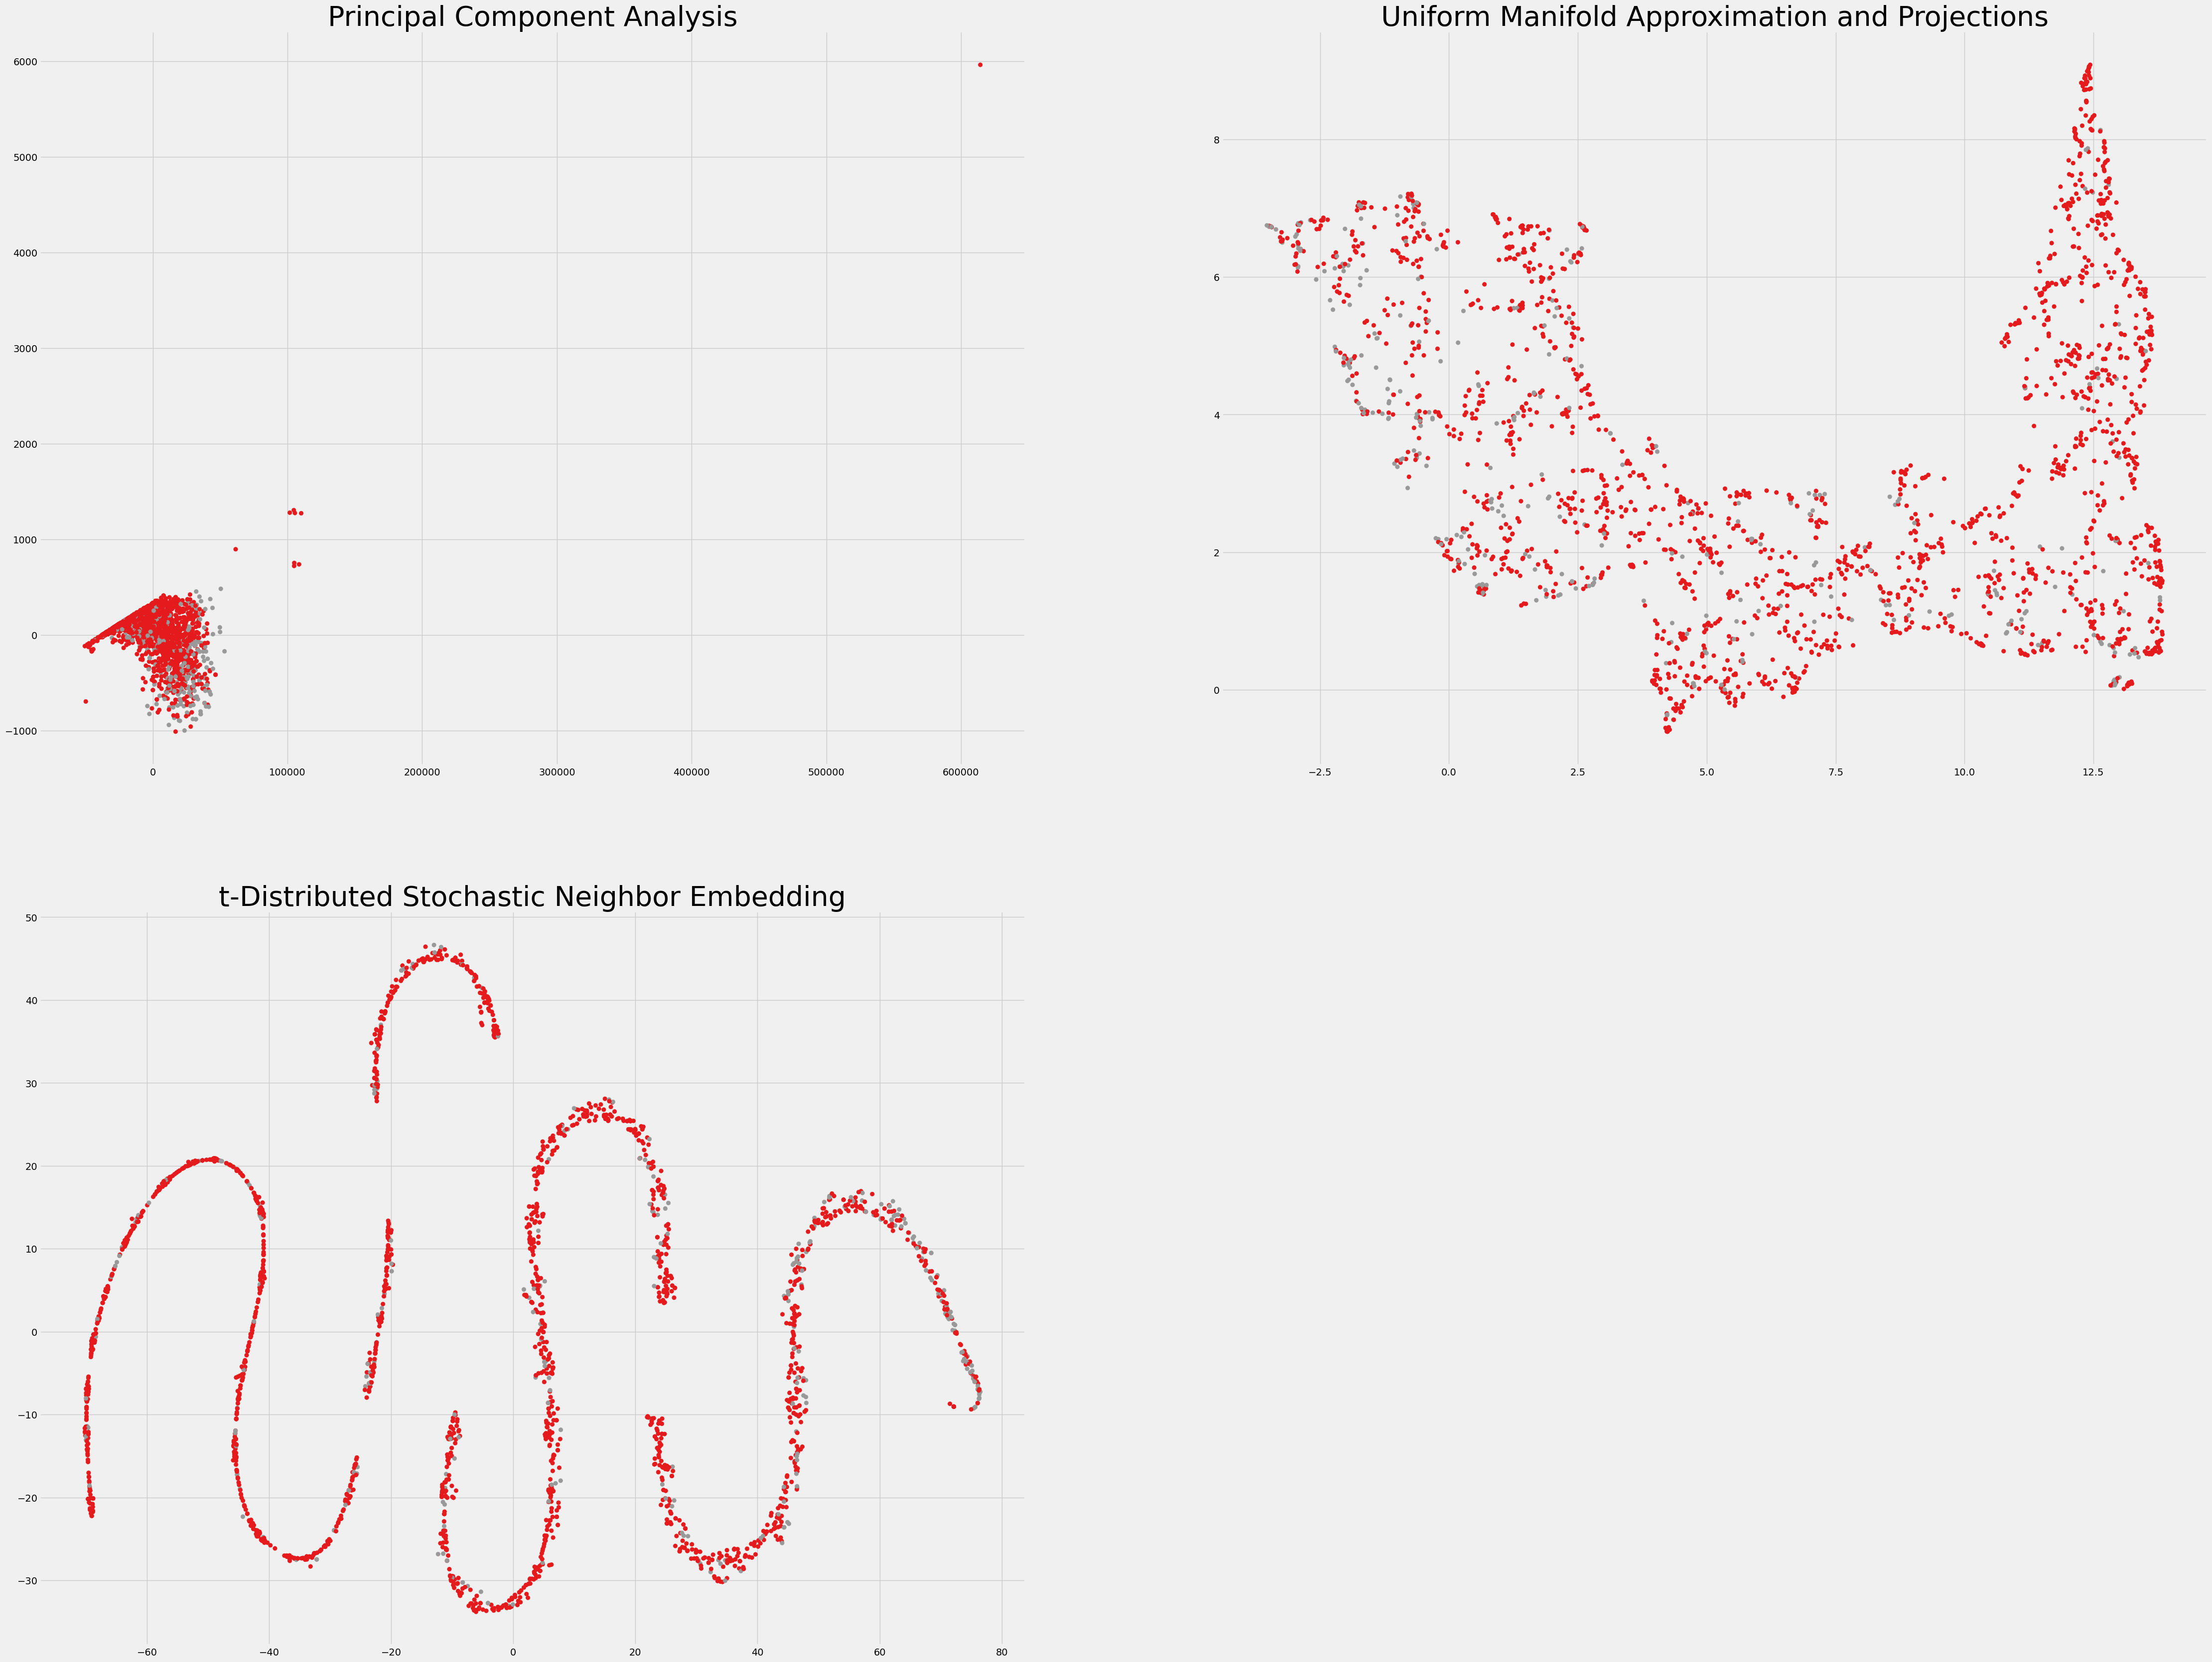

In [118]:
fig = plt.figure(figsize=(50,40))
plt.subplot(2,2,1)
plt.scatter(X_PCA[:,0], X_PCA[:,1], c=y, cmap='Set1')
plt.title("Principal Component Analysis", fontsize=40)
plt.subplot(2,2,2)
plt.scatter(X_UMAP[:,0], X_UMAP[:,1], c=y, cmap='Set1')
plt.title("Uniform Manifold Approximation and Projections", fontsize=40)
plt.subplot(2,2,3)
#plt.scatter(X_LDA[:,0], X_LDA[:,1], c=y, cmap='Set1')
#plt.title("Linear Discriminant Analysis", fontsize=40)
#plt.subplot(2,2,4)
plt.scatter(X_TSNE[:,0], X_TSNE[:,1], c=y, cmap='Set1')
plt.title("t-Distributed Stochastic Neighbor Embedding", fontsize=40)
plt.show()

In [119]:
#https://www.kaggle.com/code/cla0709/dimensionality-reduction-pca-lda-t-sne-umap
#https://www.kaggle.com/code/sivakarsiva/pca-vs-lda-vs-umap-vs-t-sne/notebook